In [1]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [3]:
# Téléchargez les ressources nécessaires (une seule fois)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziedj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()


## ** DOWNOALD DATA**

In [8]:
data = pd.read_csv("fichiers_d_exercice_machine_learning_nlp\\Data\\SMSSpamCollection.txt",sep='\t',header=None)
data.columns = ['label', 'text']
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


## ** Create function to remove punctuation, tokenize, remove stopwords, and stem**

In [9]:
def clean (text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    
    return text
clean("You are better when I am; :;/ well.")

'better well'

In [16]:
"""def clean1 (text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    
    return text
clean1("You are better when I am; :;/ well going.")"""

'better well going'

In [16]:
data['text_clean']=data['text'].apply(clean)
data


,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btn...
5568,ham,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,guy bitch act like id interest buy someth els next week gave us free


In [22]:
data_label=data.label.value_counts(normalize=True)*100
data_label

ham     86.593683
spam    13.406317
Name: label, dtype: float64

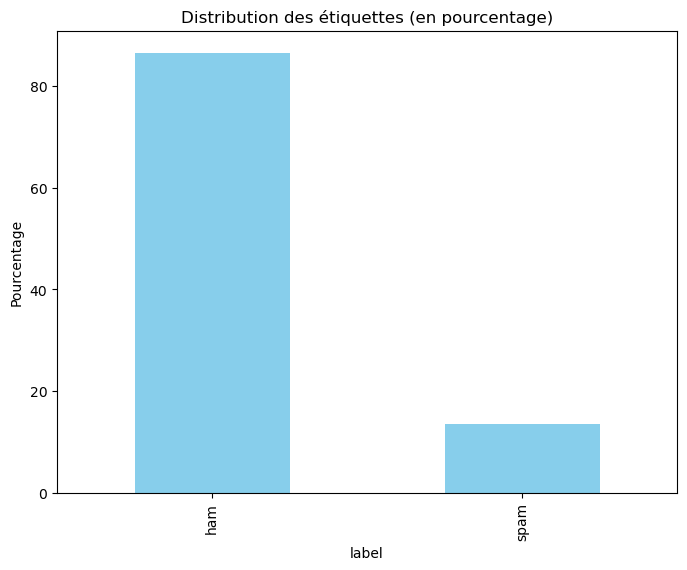

In [23]:
import matplotlib.pyplot as plt
# Tracer le diagramme à barres
plt.figure(figsize=(8, 6))
data_label.plot(kind='bar', color='skyblue')
plt.title('Distribution des étiquettes (en pourcentage)')
plt.xlabel('label')
plt.ylabel('Pourcentage')
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorisation = TfidfVectorizer()
tfidf_final = tfidf_vectorisation.fit_transform(data['text_clean'])
print(tfidf_final.shape)

(5572, 8078)


In [26]:
print(tfidf_vectorisation.get_feature_names())

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '0870

C:\Users\ziedj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
